## Python for data analysis
## Final Project

1. Загрузить файл hr.csv (можно найти во сложении к заданию)
2. Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение)
3. Рассчитать и визуализировать корреляционную матрицу для переменных
4. Визуализировать несколько взаимосвязей между переменными
5. С использованием t-test статистики проверить взаимосвязи между несколькими переменными
6. Рассчитать сколько работников работает в каждом департаменте
7. Показать распределение сотрудников по зарплатам
8. Показать распределение сотрудников по зарплатам совместно с департаментами
9. Сколько сотрудников покинули компанию
10. Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию
11. Загрузить результат (в формате .ipynb ноутбука) в репозиторий. Разместить ссылку на репозиторий в лк на сайте

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import statsmodels as sm
import matplotlib
import pandas as pd
import io
import requests
import ssl
import seaborn as sns

from sklearn.metrics import classification_report
from sklearn import preprocessing
from scipy.stats import t
from scipy.stats import norm
from scipy import stats
import statistics

In [3]:
data = pd.read_csv('hr.csv')
data.head(20)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


## Рассчитаем основные статистики для переменных

Среднее – математическое ожидание

In [4]:
data.mean()

satisfaction_level         0.612834
last_evaluation            0.716102
number_project             3.803054
average_montly_hours     201.050337
time_spend_company         3.498233
Work_accident              0.144610
left                       0.238083
promotion_last_5years      0.021268
dtype: float64

Медиана – значение случайного распределения, такое что ровно половина выборки меньше него, а ровно половина - больше.

In [5]:
data.median()

satisfaction_level         0.64
last_evaluation            0.72
number_project             4.00
average_montly_hours     200.00
time_spend_company         3.00
Work_accident              0.00
left                       0.00
promotion_last_5years      0.00
dtype: float64

Мода - значение, которое наиболее часто встречается в выборке

In [6]:
data.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


min/max 

In [7]:
data.min()

satisfaction_level       0.09
last_evaluation          0.36
number_project              2
average_montly_hours       96
time_spend_company          2
Work_accident               0
left                        0
promotion_last_5years       0
sales                      IT
salary                   high
dtype: object

In [8]:
data.max()

satisfaction_level               1
last_evaluation                  1
number_project                   7
average_montly_hours           310
time_spend_company              10
Work_accident                    1
left                             1
promotion_last_5years            1
sales                    technical
salary                      medium
dtype: object

среднеквадратичное отклонение

In [9]:
data.std()

satisfaction_level        0.248631
last_evaluation           0.171169
number_project            1.232592
average_montly_hours     49.943099
time_spend_company        1.460136
Work_accident             0.351719
left                      0.425924
promotion_last_5years     0.144281
dtype: float64

Рассчитать и визуализировать корреляционную матрицу для переменных

In [10]:
data.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.00,0.11,-0.14,-0.02,-0.10,0.06,-0.39,0.03
last_evaluation,0.11,1.00,0.35,0.34,0.13,-0.01,0.01,-0.01
number_project,-0.14,0.35,1.00,0.42,0.20,-0.00,0.02,-0.01
average_montly_hours,-0.02,0.34,0.42,1.00,0.13,-0.01,0.07,-0.00
time_spend_company,-0.10,0.13,0.20,0.13,1.00,0.00,0.14,0.07
Work_accident,0.06,-0.01,-0.00,-0.01,0.00,1.00,-0.15,0.04
left,-0.39,0.01,0.02,0.07,0.14,-0.15,1.00,-0.06
promotion_last_5years,0.03,-0.01,-0.01,-0.00,0.07,0.04,-0.06,1.00


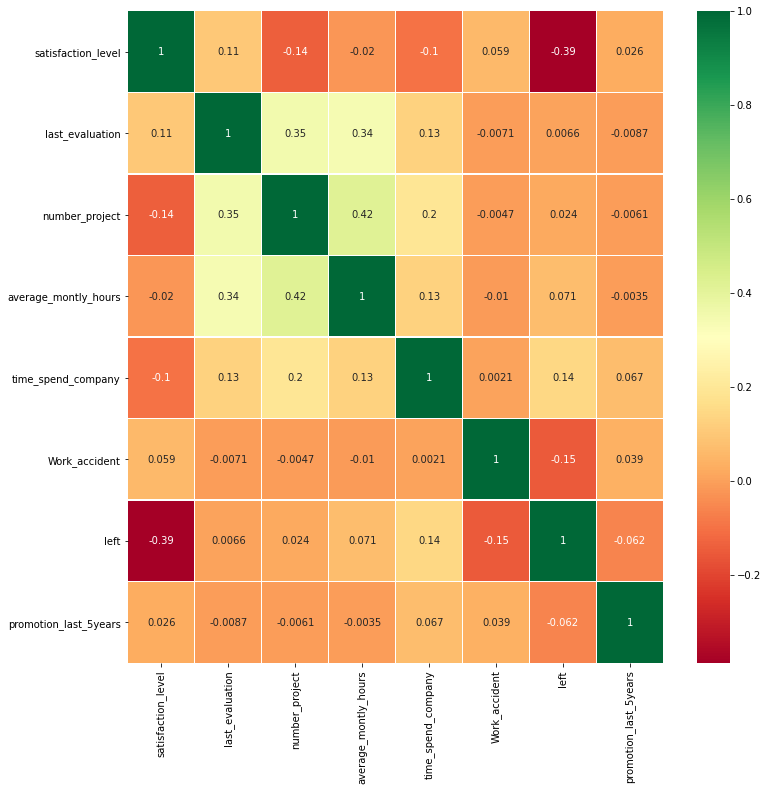

In [11]:
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(12,12)
plt.show()

**Вывод:** Чем больше кол-во проектов, тем больше часов проводит на работе сотрудник. 
Также переменная кол-ва проектов коррелирует с показателем последней оценки сотрудника, чем больше проектов, тем выше оценка. 
Отметим, что показатель удовлетворенности работой в компании низкий у сотрудников, которые покинули компанию. Возможно, это говорит о том, что они ушли 'на негативе'. 

Визуализировать несколько взаимосвязей между переменными

Коэффициент корреляции Пирсона: 0.41721063440177725


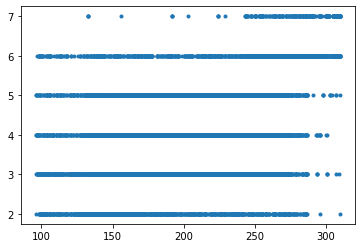

In [12]:
from scipy.stats import pearsonr
x = data['average_montly_hours']
y = data['number_project']

corr, p_value = pearsonr(x, y)
plt.scatter(x, y, marker='.')
print('Коэффициент корреляции Пирсона:', corr)

In [13]:
corr, p_value = pearsonr(x, y)
print(corr)

0.41721063440177725


Построим попарные графики для выборок, а также частотные графики на главной диагонали с помощью метода pairplot.

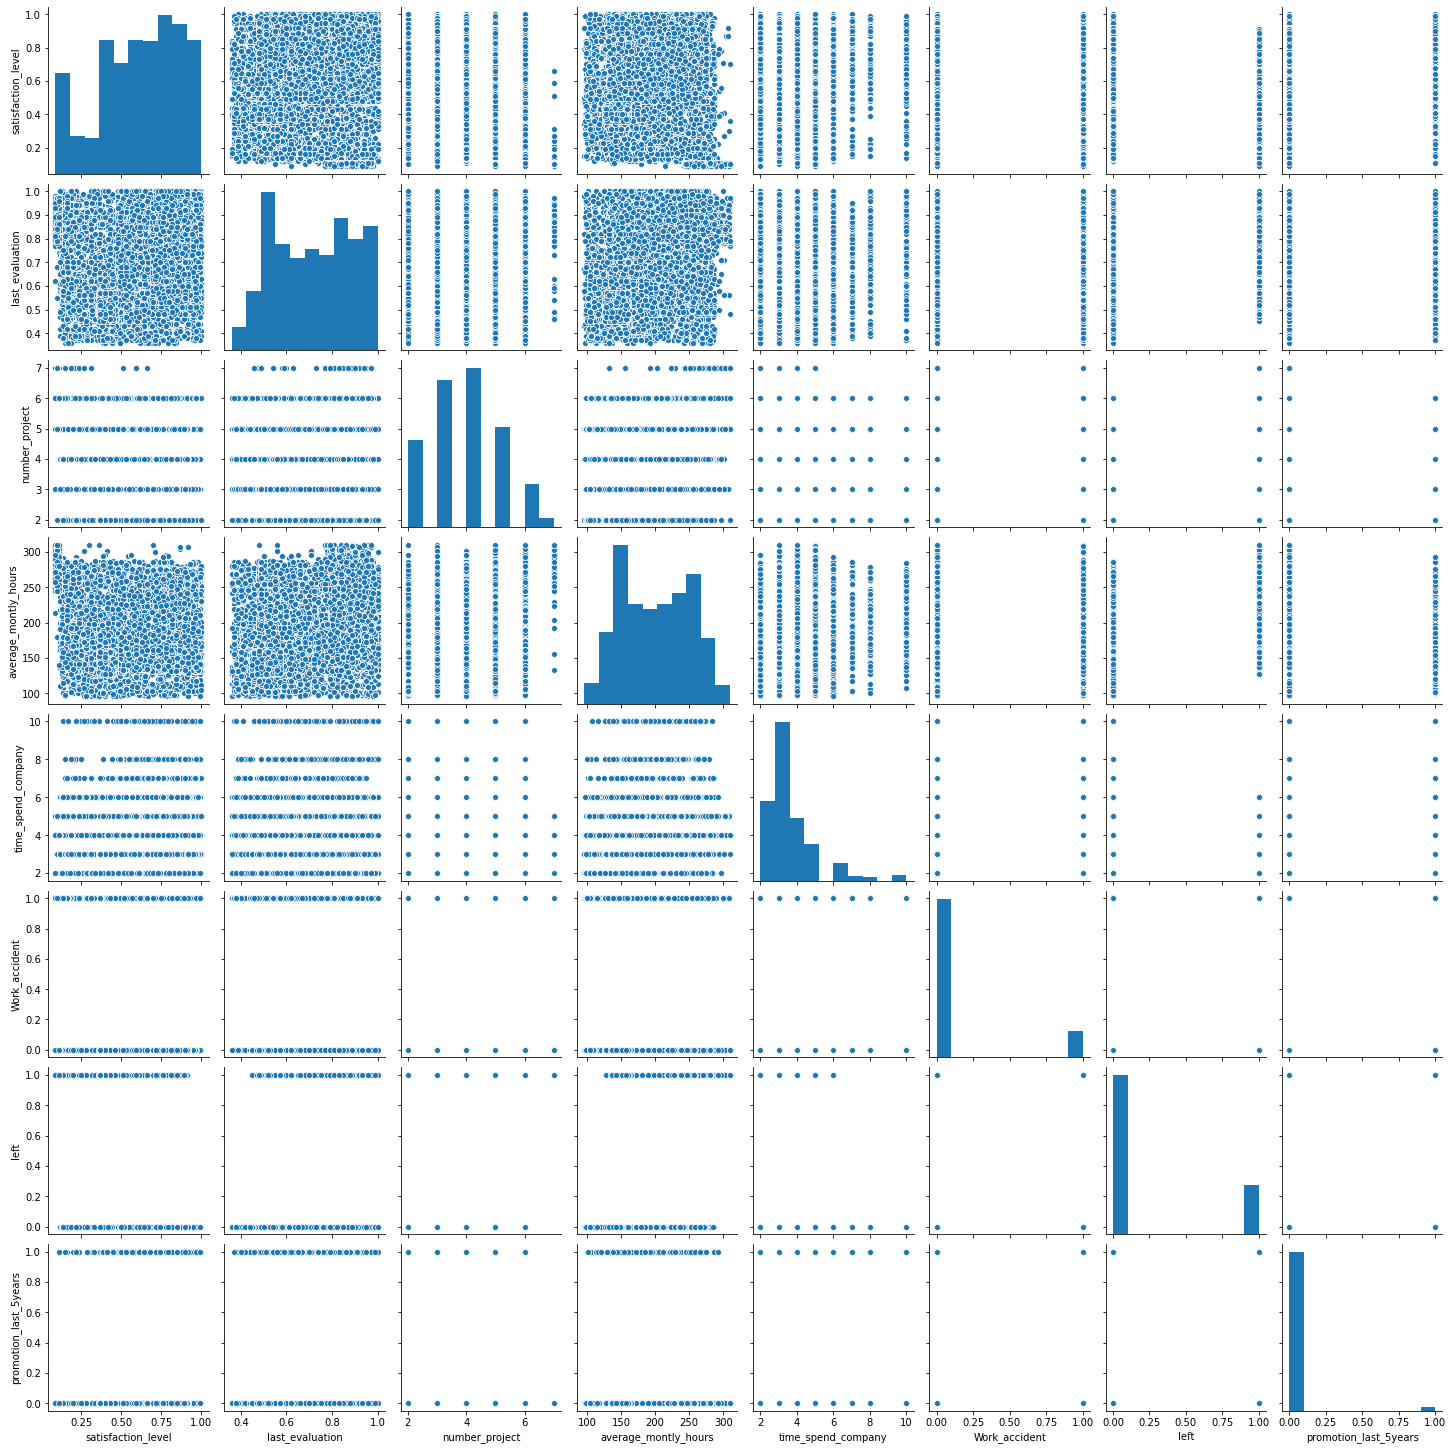

In [14]:
graphs = sns.pairplot(data)

Из данных графиков можно увидеть, что work_accident, left, promotion last 5years являются дискретными величинами со значениями [0,1], [0,1], [0,1] соответственно (распределение Бернулли).

Можно также заметить, что переменная number of projects являятся распределением, близким к нормальному распределению Гаусса.

С использованием t-test статистики проверить взаимосвязь переменной satisfaction level между уволенными и не уволенными.

In [15]:
data_left = data[data['left'] == 1]['satisfaction_level']
data_still_working = data[data['left'] == 0]['satisfaction_level']

In [16]:
print(stats.ttest_ind(data_left, data_still_working))

Ttest_indResult(statistic=-51.61280155890104, pvalue=0.0)


**Вывод:** 
Выборки сильно отличаются – зависимость satisfaction level и уволенными/неуволенными сотрудниками есть

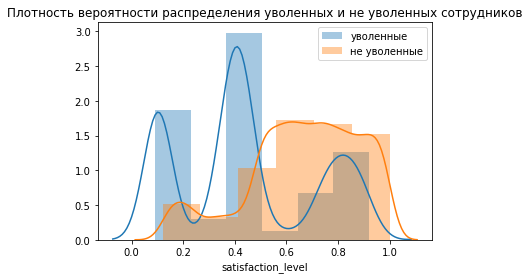

In [17]:
sns.distplot(data_left, 6)
sns.distplot(data_still_working, 6)
plt.title('Плотность вероятности распределения уволенных и не уволенных сотрудников')
plt.legend(['уволенные', 'не уволенные'])
plt.show()

Выборки отличаются – зависимость satisfaction level и уволенными/неуволенными сотрудниками есть

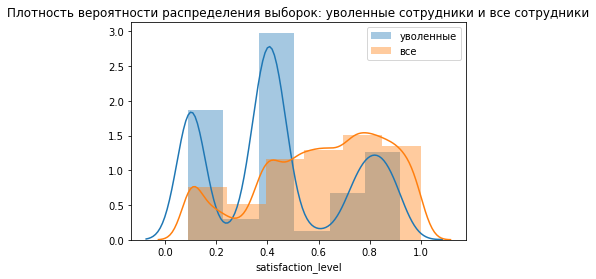

In [18]:
sns.distplot(data_left, 6)
sns.distplot(data['satisfaction_level'], 6)
plt.title('Плотность вероятности распределения выборок: уволенные сотрудники и все сотрудники')
plt.legend(['уволенные', 'все'])
plt.show()

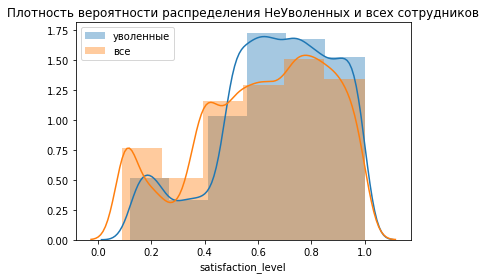

Ttest_indResult(statistic=18.457519811640605, pvalue=1.3563197471200525e-75)
Ttest_1sampResult(statistic=26.577799941338863, pvalue=4.5259233104411325e-151)


In [20]:
sns.distplot(data_still_working, 6)
sns.distplot(data['satisfaction_level'], 6)
plt.title('Плотность вероятности распределения НеУволенных и всех сотрудников')
plt.legend(['уволенные', 'все'])
plt.show()
print(stats.ttest_ind(data_still_working, data['satisfaction_level'] ))
print(stats.ttest_1samp(data_still_working, data['satisfaction_level'].mean()))

**Вывод:** Выборки всех сотрудников и неуволенных похожи, что подтверждает зависимость между переменными.

Рассчитать сколько работников работает в каждом департаменте

In [18]:
data = data.reset_index()

In [19]:
data_by_department = data.groupby(data['sales']).count()
data_by_department.filter(items = ['index']).sort_values('index', ascending = False)

,index
sales,
sales,4140
technical,2720
support,2229
IT,1227
product_mng,902
marketing,858
RandD,787
accounting,767
hr,739


Показать распределение сотрудников по зарплатам

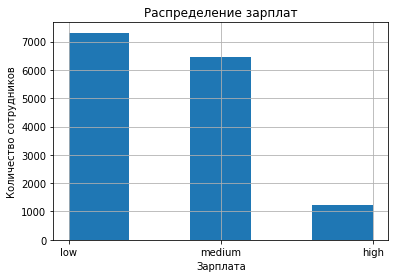

In [20]:
plt.hist(data['salary'],5)
plt.xlabel('Зарплата')
plt.ylabel('Количество сотрудников')
plt.title('Распределение зарплат')
plt.grid(True)
plt.show()

In [21]:
print('Сотрудников с низкой зарплатой -', len(data[data['salary']=='low']), ' {:.2f}%'.format(len(data[data['salary']=='low'])/len(data)*100))
print('Сотрудников со средней зарплатой -',len(data[data['salary']=='medium']), ' {:.2f}%'.format(len(data[data['salary']=='medium'])/len(data)*100))
print('Сотрудников со высокой зарплатой -',len(data[data['salary']=='high']), ' {:.2f}%'.format(len(data[data['salary']=='high'])/len(data)*100))

Сотрудников с низкой зарплатой - 7316  48.78%
Сотрудников со средней зарплатой - 6446  42.98%
Сотрудников со высокой зарплатой - 1237  8.25%


Показать распределение сотрудников по зарплатам совместно с департаментами

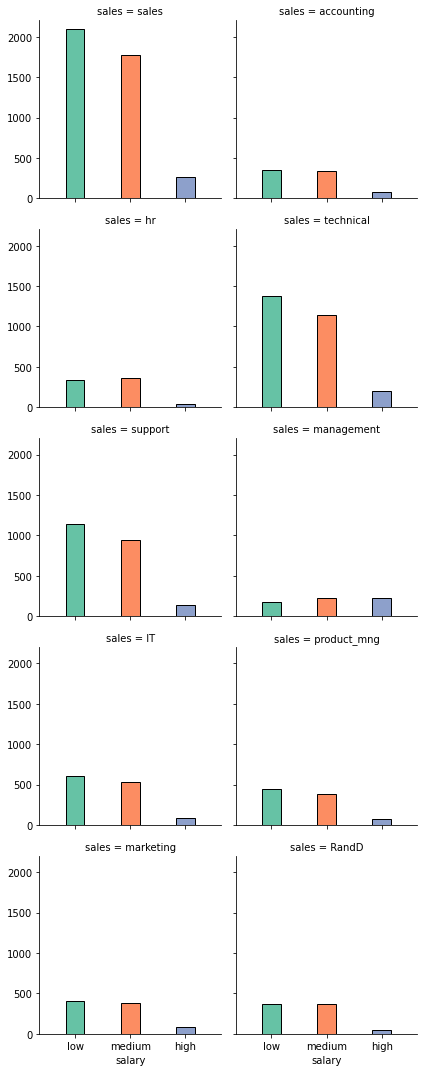

In [22]:
bins = 3
g = sns.FacetGrid(data, col = "sales", hue = "salary", palette = "Set2", col_wrap = 2)
g.map(plt.hist, 'salary', bins = bins, ec = "k")

**Вывод:** по графикам видно, что кол-во низких зарплат в компании в большинстве своем получают сотрудники отдела sales = hr и management; сотрудники отдела product management получают наиболее высокие зарплаты в соотношении кол-ва сотрудников и их 

Сколько сотрудников покинули компанию

In [23]:
print('Компанию покинули =', data['left'].value_counts()[1], 'человек')

Компанию покинули = 3571 человек


Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию

In [24]:
data_left= data[data['salary'] == 'low']['left']
stats.ttest_1samp(data_left, data['left'].mean())

Ttest_1sampResult(statistic=11.007411787730103, pvalue=5.828800133014715e-28)

на основе p-value, мы предполагаем, что среди уволившихся сотрудников очень много людей с низкой зарплатой

In [25]:
left_evaluation = data[data['left'] == 1]['last_evaluation']
still_working_evaluation = data[data['left'] == 0]['last_evaluation']
stats.ttest_ind(left_evaluation, still_working_evaluation)

Ttest_indResult(statistic=0.8042416167796329, pvalue=0.4212701963735056)

Отсутствуют различия между последними оценками у уволившихся и работающих сотрудников

In [26]:
data_left= data[data['left'] == 1]
no_promotion = data_left.groupby(data_left['promotion_last_5years']).count()
no_promotion.filter(items=['index']).sort_values('index', ascending=False)

,index
promotion_last_5years,
0,3552
1,19


предположим, что сотрудники часто уходили потому что не получали повышение

/Users/victoriabelavina/Netology/env/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Users/victoriabelavina/Netology/env/lib/python3.7/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


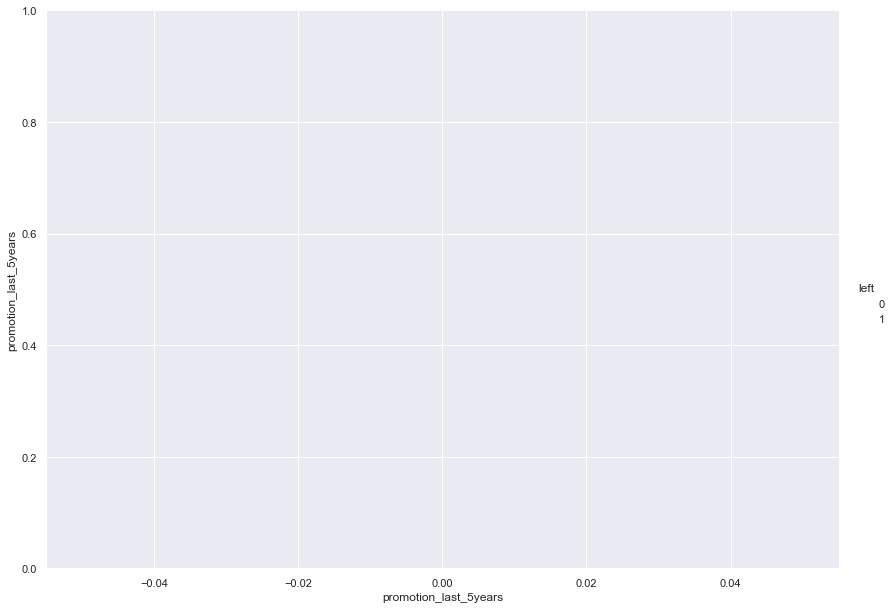

In [27]:
sns.set(rc={'figure.figsize':(25,25)})
fig_1 = sns.pairplot(data=data, vars=["promotion_last_5years"], hue='left', height=8.27, aspect=11.7/8.27)